In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv('download-20.csv')

In [3]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
df.shape

(3000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [6]:
df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [7]:
df.describe(include='all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [8]:
df.size

30000

In [9]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [10]:
import missingno as msng

<AxesSubplot:>

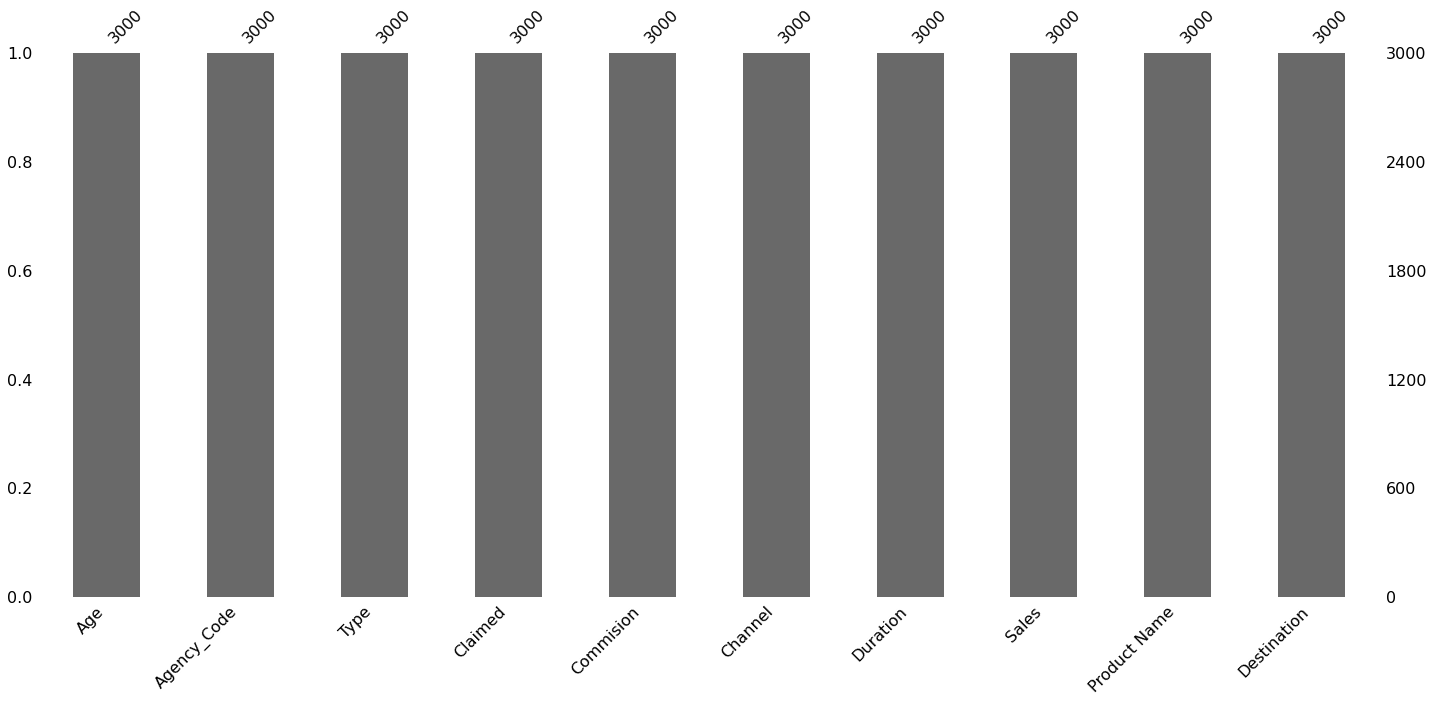

In [11]:
msng.bar(df)

In [12]:
df.duplicated().sum()

139

*Although we see that there are around 139 rows that seems to have duplicated data, but i am not deleting these as these can definitely be different observations. The same travel agency with teh code can sell the travel insurance through same channel earn same commission from the same person withs ame age for a trip to same destination etc. more than once. there can be travellers who woudl be travelling similar trips and purchasing the travel insurance for those trips. So this duplicated data in the current dataset can represent different observations and hence I wont recommend deleting these different observation points.*

In [13]:
df.dtypes.value_counts()

object     6
int64      2
float64    2
dtype: int64

In [14]:
df[df['Commision']>100]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
133,44,CWT,Travel Agency,Yes,149.37,Online,366,229.80,Silver Plan,Americas
186,53,CWT,Travel Agency,Yes,106.92,Online,64,178.20,Customised Plan,Americas
239,32,C2B,Airlines,Yes,126.75,Online,90,507.00,Silver Plan,ASIA
246,39,CWT,Travel Agency,Yes,210.21,Online,368,323.40,Gold Plan,Americas
323,54,CWT,Travel Agency,No,100.98,Online,18,0.00,Customised Plan,Americas
448,24,C2B,Airlines,Yes,103.00,Online,166,412.00,Silver Plan,ASIA
511,52,C2B,Airlines,Yes,108.00,Online,367,432.00,Silver Plan,ASIA
529,33,CWT,Travel Agency,Yes,208.16,Online,368,320.25,Gold Plan,Americas
631,31,CWT,Travel Agency,Yes,112.86,Online,175,188.10,Customised Plan,EUROPE
734,60,CWT,Travel Agency,Yes,166.53,Online,365,256.20,Gold Plan,Americas


In [15]:
df[df['Duration']<0]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.3,Online,-1,18.0,Bronze Plan,ASIA


In [16]:
df.loc[df['Duration']<0, 'Duration'] = 0

In [17]:
df[df['Duration']<0]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


In [18]:
df[df['Duration']>1000]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2845,48,C2B,Airlines,No,0.09,Online,4580,0.32,Customised Plan,ASIA


In [19]:
df[df['Duration']<1000].max()

Age                        84
Agency_Code               JZI
Type            Travel Agency
Claimed                   Yes
Commision              210.21
Channel                Online
Duration                  466
Sales                   539.0
Product Name      Silver Plan
Destination            EUROPE
dtype: object

In [20]:
df.loc[df['Duration']>1000, 'Duration'] = 466

In [21]:
df[df['Duration']>1000]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


# EDA

In [22]:
# Univariate Analysis

def univariateAnalysis_numeric(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.displot(df[column], kde=True,color='purple');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column],color='lightblue')
    plt.show()
    
    plt.figure()
    print("Violin Plot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.violinplot(x=df[column],color='green')
    plt.show()

In [23]:
df_num = df[['Age','Commision','Duration','Sales']]

In [24]:
df_num.head()

,Age,Commision,Duration,Sales
0,48,0.70,7,2.51
1,36,0.00,34,20.00
2,39,5.94,3,9.90
3,36,0.00,4,26.00
4,33,6.30,53,18.00


Description of Age
----------------------------------------------------------------------------
count    3000.000000
mean       38.091000
std        10.463518
min         8.000000
25%        32.000000
50%        36.000000
75%        42.000000
max        84.000000
Name: Age, dtype: float64 Distribution of Age
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

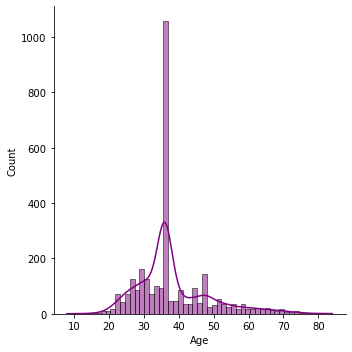

BoxPlot of Age
----------------------------------------------------------------------------


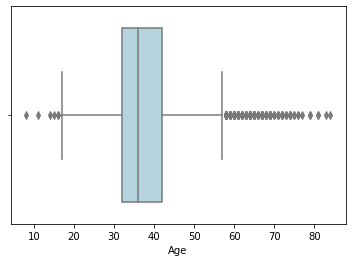

Violin Plot of Age
----------------------------------------------------------------------------


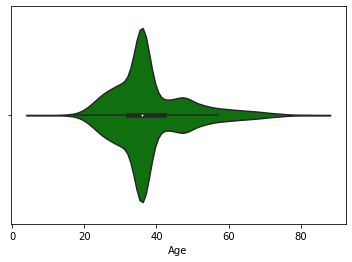

Description of Commision
----------------------------------------------------------------------------
count    3000.000000
mean       14.529203
std        25.481455
min         0.000000
25%         0.000000
50%         4.630000
75%        17.235000
max       210.210000
Name: Commision, dtype: float64 Distribution of Commision
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

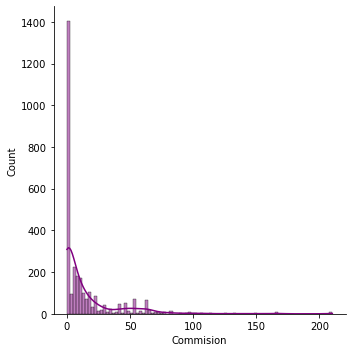

BoxPlot of Commision
----------------------------------------------------------------------------


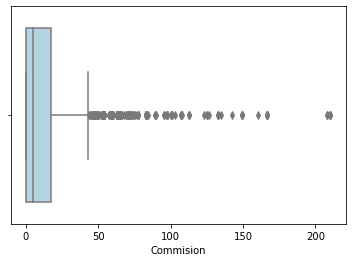

Violin Plot of Commision
----------------------------------------------------------------------------


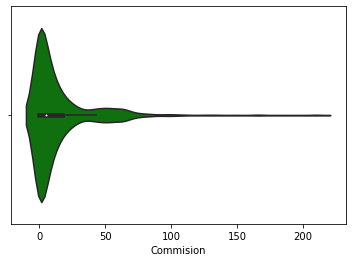

Description of Duration
----------------------------------------------------------------------------
count    3000.000000
mean       68.630333
std       106.011143
min         0.000000
25%        11.000000
50%        26.500000
75%        63.000000
max       466.000000
Name: Duration, dtype: float64 Distribution of Duration
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

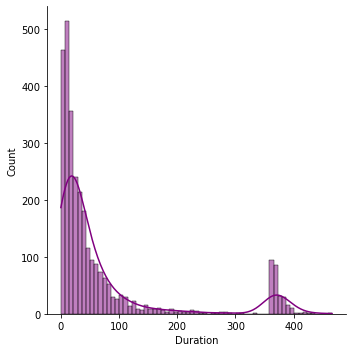

BoxPlot of Duration
----------------------------------------------------------------------------


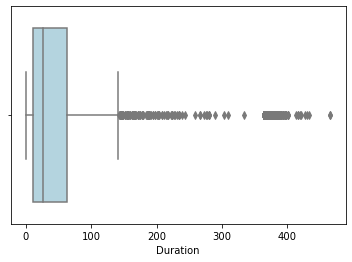

Violin Plot of Duration
----------------------------------------------------------------------------


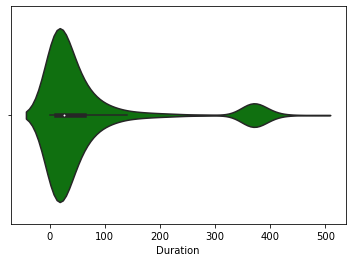

Description of Sales
----------------------------------------------------------------------------
count    3000.000000
mean       60.249913
std        70.733954
min         0.000000
25%        20.000000
50%        33.000000
75%        69.000000
max       539.000000
Name: Sales, dtype: float64 Distribution of Sales
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

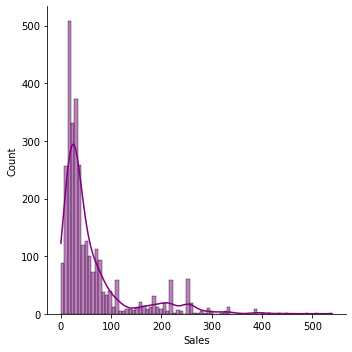

BoxPlot of Sales
----------------------------------------------------------------------------


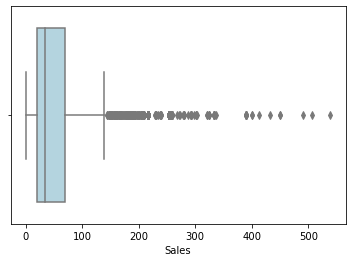

Violin Plot of Sales
----------------------------------------------------------------------------


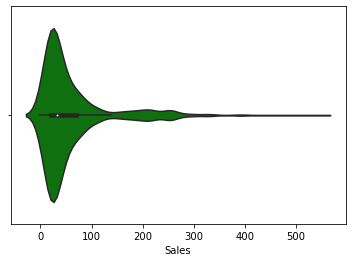

In [25]:
for i in df_num.columns:
    univariateAnalysis_numeric(i)

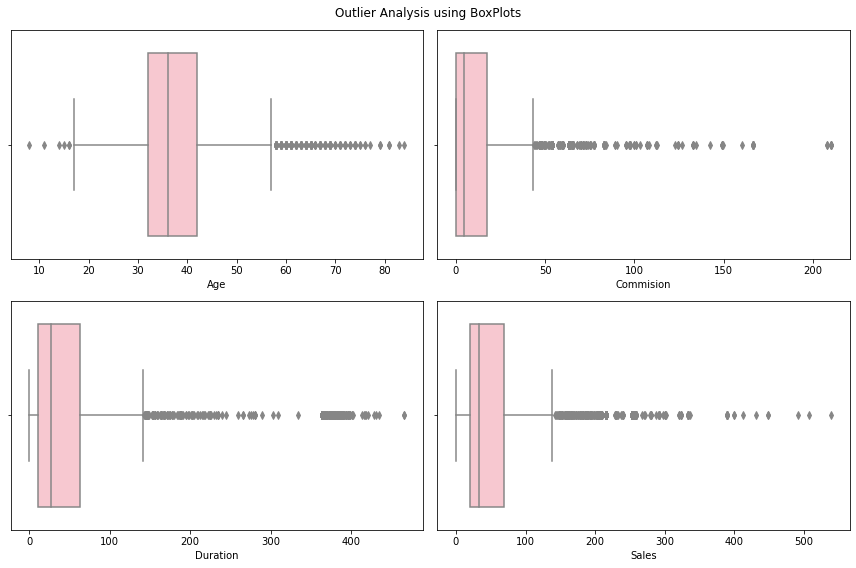

In [26]:
fig, ax = plt.subplots(2, 2, figsize = (12, 8))
ax = ax.flatten()

for i, c in enumerate(df_num.columns):
    sns.boxplot(x = df_num[c], ax = ax[i],color='pink')
plt.suptitle('Outlier Analysis using BoxPlots', fontsize = 12)
fig.tight_layout()

In [27]:
IQR =stats.iqr(df.Age, nan_policy='omit')
IQR

10.0

In [28]:
## Calculation of Q1 and Q3
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
print(Q1,Q3)

32.0 42.0


In [29]:
## Calculation of Upper and Lower limits
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print(lower_limit,upper_limit)

17.0 57.0


In [30]:
# List of Outliers in Age column
df[(df.Age<lower_limit)|(df.Age>upper_limit)]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
6,61,CWT,Travel Agency,No,35.64,Online,30,59.4,Customised Plan,Americas
30,60,JZI,Airlines,No,7.70,Online,11,22.0,Bronze Plan,ASIA
77,59,C2B,Airlines,Yes,9.75,Online,28,39.0,Silver Plan,ASIA
87,59,JZI,Airlines,No,9.10,Online,12,150.0,Bronze Plan,ASIA
90,58,EPX,Travel Agency,Yes,0.00,Online,36,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2917,69,CWT,Travel Agency,No,10.50,Offline,29,30.0,Customised Plan,ASIA
2935,67,EPX,Travel Agency,No,0.00,Online,21,10.0,Cancellation Plan,ASIA
2945,63,C2B,Airlines,Yes,11.75,Online,16,47.0,Bronze Plan,ASIA
2969,60,JZI,Airlines,No,7.70,Online,39,22.0,Bronze Plan,ASIA


In [31]:
#Percentge of Outliers in Age
204/3000*100

6.800000000000001

In [32]:
IQR =stats.iqr(df.Commision, nan_policy='omit')
IQR

17.235

In [33]:
## Calculation of Q1 and Q3
Q1 = df.Commision.quantile(0.25)
Q3 = df.Commision.quantile(0.75)
print(Q1,Q3)

0.0 17.235


In [34]:
## Calculation of Upper and Lower limits
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print(lower_limit,upper_limit)

-25.8525 43.0875


In [35]:
# List of Outliers in Commision
df[(df.Commision<lower_limit)|(df.Commision>upper_limit)]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
10,37,C2B,Airlines,Yes,46.96,Online,368,187.85,Silver Plan,ASIA
15,39,C2B,Airlines,Yes,54.00,Online,366,216.00,Silver Plan,ASIA
17,45,CWT,Travel Agency,No,59.40,Online,40,99.00,Customised Plan,Americas
45,32,C2B,Airlines,Yes,54.00,Online,366,216.00,Silver Plan,ASIA
52,40,C2B,Airlines,Yes,63.21,Online,364,252.85,Silver Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2978,45,C2B,Airlines,Yes,83.25,Online,373,333.00,Gold Plan,ASIA
2981,34,C2B,Airlines,Yes,63.21,Online,376,252.85,Silver Plan,ASIA
2991,29,C2B,Airlines,Yes,48.30,Online,381,193.20,Silver Plan,ASIA
2994,27,C2B,Airlines,Yes,71.85,Online,416,287.40,Gold Plan,ASIA


In [36]:
#Percentge of Outliers in Commision
362/3000*100

12.066666666666666

In [37]:
IQR =stats.iqr(df.Duration, nan_policy='omit')
print(IQR)

## Calculation of Q1 and Q3
Q1 = df.Duration.quantile(0.25)
Q3 = df.Duration.quantile(0.75)
print(Q1,Q3)

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print(lower_limit,upper_limit)

52.0
11.0 63.0
-67.0 141.0


In [38]:
# List of Outliers in Duration
df[(df.Duration<lower_limit)|(df.Duration>upper_limit)]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
10,37,C2B,Airlines,Yes,46.96,Online,368,187.85,Silver Plan,ASIA
15,39,C2B,Airlines,Yes,54.00,Online,366,216.00,Silver Plan,ASIA
45,32,C2B,Airlines,Yes,54.00,Online,366,216.00,Silver Plan,ASIA
46,26,C2B,Airlines,Yes,40.25,Online,366,161.00,Silver Plan,ASIA
52,40,C2B,Airlines,Yes,63.21,Online,364,252.85,Silver Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2991,29,C2B,Airlines,Yes,48.30,Online,381,193.20,Silver Plan,ASIA
2992,28,CWT,Travel Agency,No,11.88,Online,389,19.80,Customised Plan,ASIA
2993,36,EPX,Travel Agency,No,0.00,Online,234,10.00,Cancellation Plan,ASIA
2994,27,C2B,Airlines,Yes,71.85,Online,416,287.40,Gold Plan,ASIA


In [39]:
#Percentge of Outliers in Duration
362/3000*100

12.066666666666666

In [40]:
IQR =stats.iqr(df.Sales, nan_policy='omit')
print(IQR)

## Calculation of Q1 and Q3
Q1 = df.Sales.quantile(0.25)
Q3 = df.Sales.quantile(0.75)
print(Q1,Q3)

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print(lower_limit,upper_limit)

49.0
20.0 69.0
-53.5 142.5


In [41]:
# List of Outliers in Duration
df[(df.Sales<lower_limit)|(df.Sales>upper_limit)]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
10,37,C2B,Airlines,Yes,46.96,Online,368,187.85,Silver Plan,ASIA
15,39,C2B,Airlines,Yes,54.00,Online,366,216.00,Silver Plan,ASIA
45,32,C2B,Airlines,Yes,54.00,Online,366,216.00,Silver Plan,ASIA
46,26,C2B,Airlines,Yes,40.25,Online,366,161.00,Silver Plan,ASIA
52,40,C2B,Airlines,Yes,63.21,Online,364,252.85,Silver Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2981,34,C2B,Airlines,Yes,63.21,Online,376,252.85,Silver Plan,ASIA
2986,36,EPX,Travel Agency,No,0.00,Online,154,147.00,Customised Plan,EUROPE
2991,29,C2B,Airlines,Yes,48.30,Online,381,193.20,Silver Plan,ASIA
2994,27,C2B,Airlines,Yes,71.85,Online,416,287.40,Gold Plan,ASIA


In [42]:
#Percentge of Outliers in Sales
353/3000*100

11.766666666666667

In [43]:
df_cat=df[['Agency_Code','Type','Claimed','Channel','Product Name','Destination']]

In [44]:
df_cat.head()

,Agency_Code,Type,Claimed,Channel,Product Name,Destination
0,C2B,Airlines,No,Online,Customised Plan,ASIA
1,EPX,Travel Agency,No,Online,Customised Plan,ASIA
2,CWT,Travel Agency,No,Online,Customised Plan,Americas
3,EPX,Travel Agency,No,Online,Cancellation Plan,ASIA
4,JZI,Airlines,No,Online,Bronze Plan,ASIA


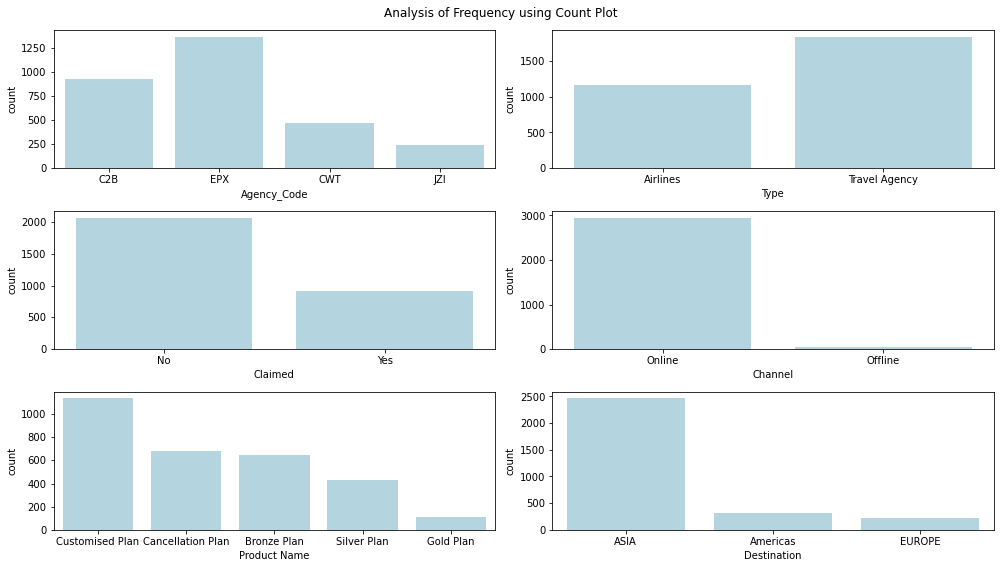

In [45]:
fig, ax = plt.subplots(3, 2, figsize = (14, 8))
ax = ax.flatten()

for i, c in enumerate(df_cat.columns):
    sns.countplot(x = df_cat[c], ax = ax[i],color='lightblue')
plt.suptitle('Analysis of Frequency using Count Plot', fontsize = 12)
fig.tight_layout()

In [46]:
df.Claimed.value_counts()

No     2076
Yes     924
Name: Claimed, dtype: int64

In [47]:
df.Claimed.value_counts(normalize=True)

No     0.692
Yes    0.308
Name: Claimed, dtype: float64

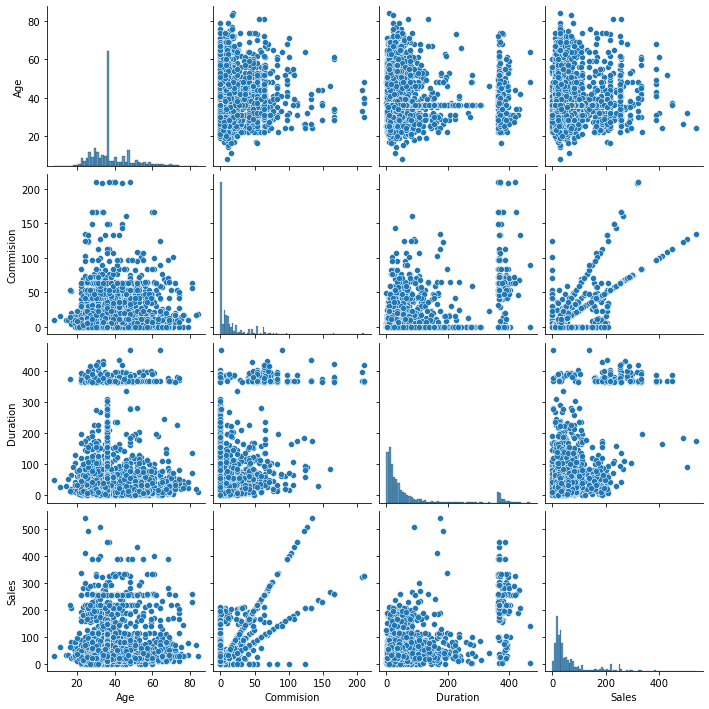

In [48]:
## Bivariate Analysis
sns.pairplot(df)
plt.show();

/Users/kushalsinghal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product Name', ylabel='Age'>

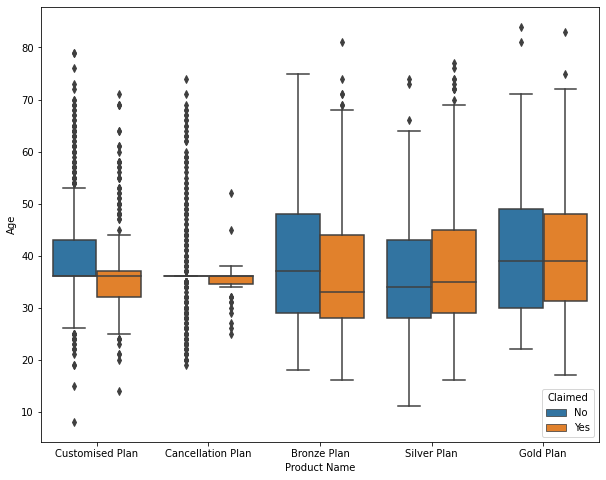

In [49]:
plt.figure(figsize=(10,8))
sns.boxplot(df['Product Name'],df['Age'],hue=df['Claimed'],orient='v')

/Users/kushalsinghal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product Name', ylabel='Duration'>

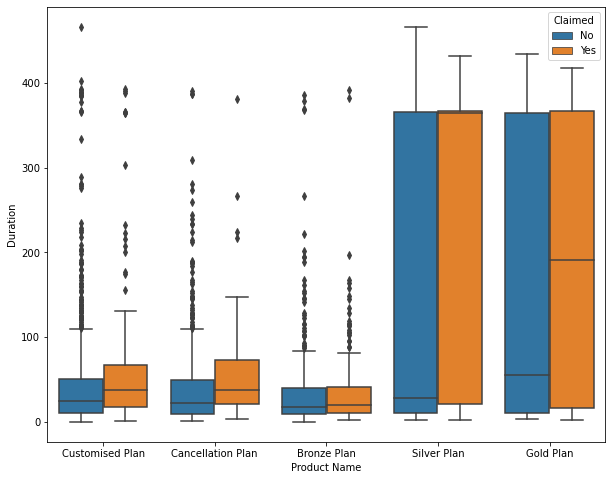

In [50]:
plt.figure(figsize=(10,8))
sns.boxplot(df['Product Name'],df['Duration'],hue=df['Claimed'],orient='v')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

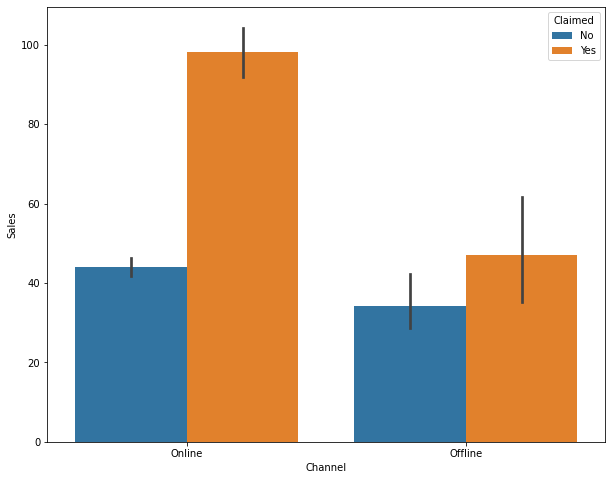

In [51]:
plt.figure(figsize=(10,8))
sns.barplot(x='Channel',y='Sales',hue='Claimed',data=df)

<AxesSubplot:xlabel='Product Name', ylabel='Commision'>

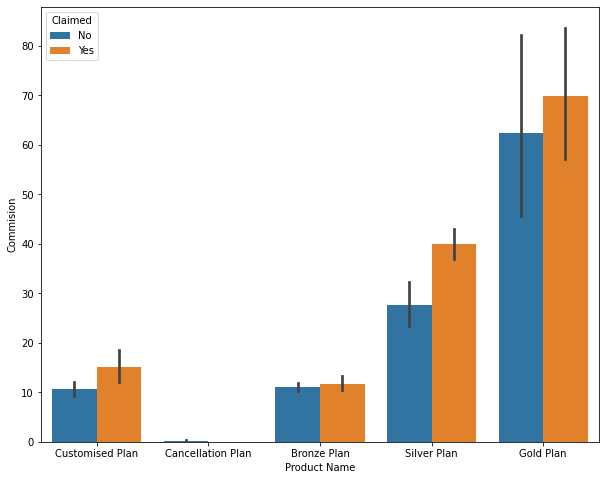

In [52]:
plt.figure(figsize=(10,8))
sns.barplot(x='Product Name',y='Commision',hue='Claimed',data=df)

<AxesSubplot:xlabel='Channel', ylabel='Commision'>

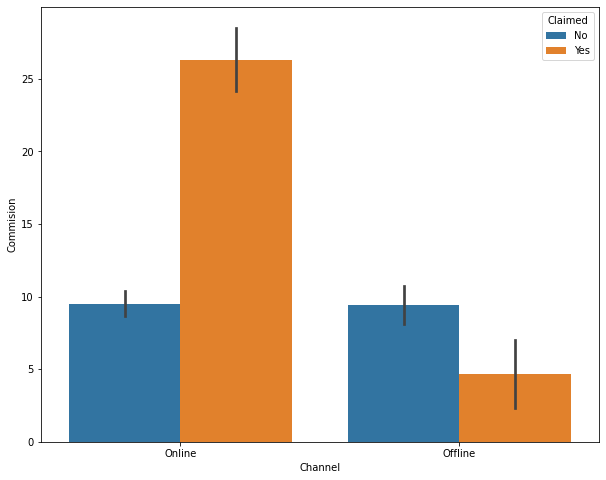

In [53]:
plt.figure(figsize=(10,8))
sns.barplot(x='Channel',y='Commision',hue='Claimed',data=df)

<AxesSubplot:xlabel='Channel', ylabel='Age'>

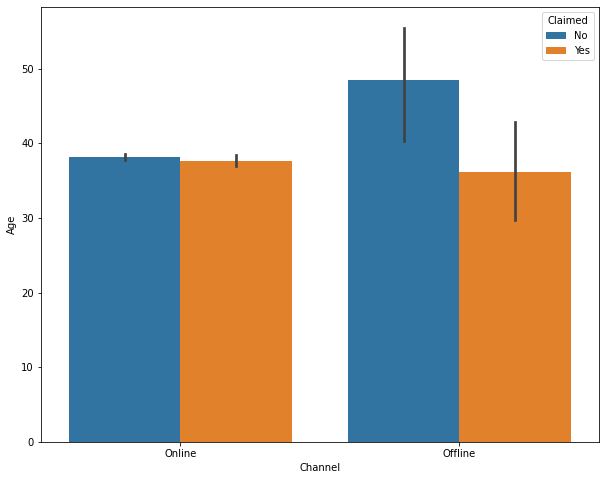

In [54]:
plt.figure(figsize=(10,8))
sns.barplot(x='Channel',y='Age',hue='Claimed',data=df)

<AxesSubplot:xlabel='Product Name', ylabel='Age'>

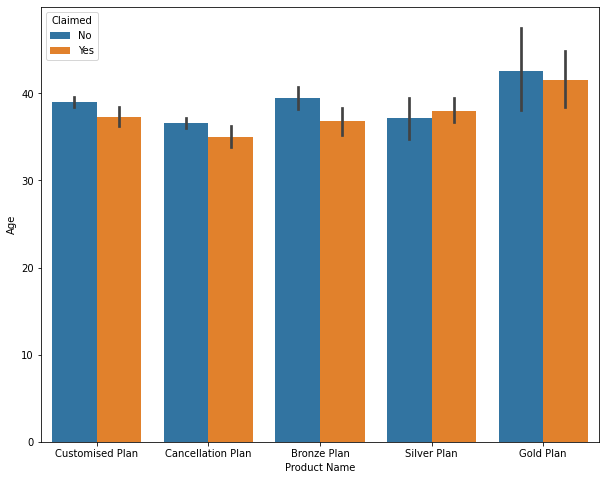

In [55]:
plt.figure(figsize=(10,8))
sns.barplot(x='Product Name',y='Age',hue='Claimed',data=df)

<AxesSubplot:xlabel='Destination', ylabel='Duration'>

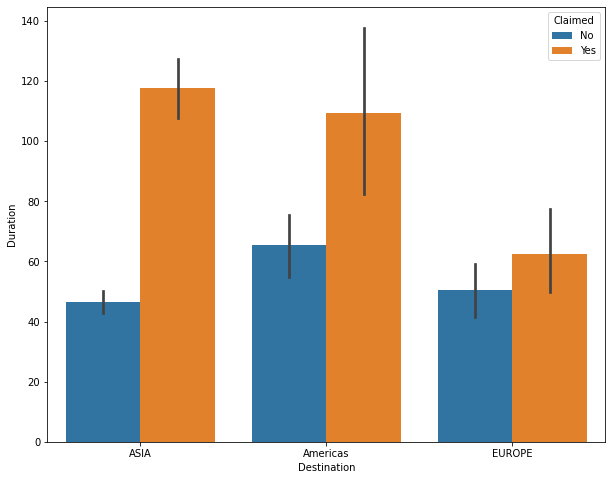

In [56]:
plt.figure(figsize=(10,8))
sns.barplot(x='Destination',y='Duration',hue='Claimed',data=df)

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

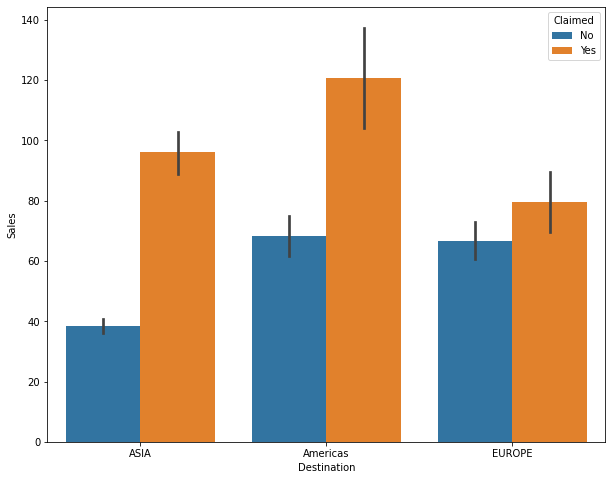

In [57]:
plt.figure(figsize=(10,8))
sns.barplot(x='Destination',y='Sales',hue='Claimed',data=df)

<AxesSubplot:xlabel='Destination', ylabel='Commision'>

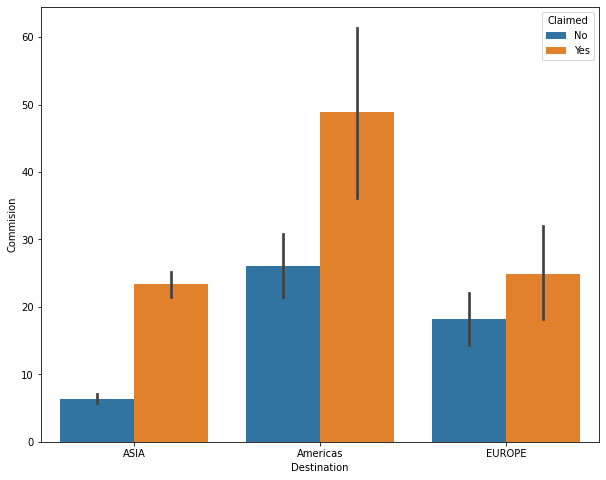

In [58]:
plt.figure(figsize=(10,8))
sns.barplot(x='Destination',y='Commision',hue='Claimed',data=df)

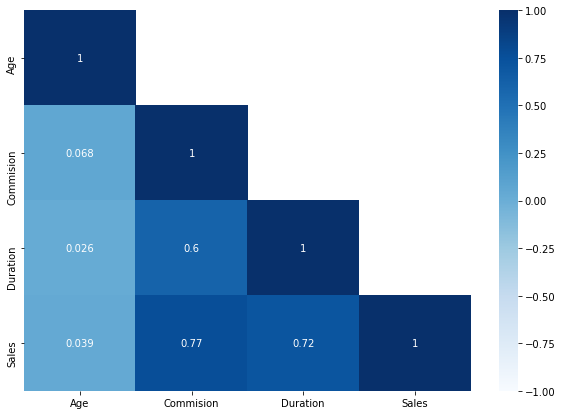

In [59]:
#MultiVariate ANalysis

df_corr=df.corr()

plt.figure(figsize=(10,7))
mask = np.array(df_corr)
mask[np.tril_indices_from(mask)] =False
sns.heatmap(data =df_corr, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='Blues');

In [60]:
##### many columns are of type object i.e. strings. These need to be converted to ordinal type
print('Agency_Code \n',df.Agency_Code.value_counts())
print('\n')
print('Type \n',df.Type.value_counts())
print('\n')
print('Claimed \n',df.Claimed.value_counts())
print('\n')
print('Channel \n',df.Channel.value_counts())
print('\n')
print('Product Name \n',df['Product Name'].value_counts())
print('\n')
print('Destination \n',df.Destination.value_counts())

Agency_Code 
 EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


Type 
 Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


Claimed 
 No     2076
Yes     924
Name: Claimed, dtype: int64


Channel 
 Online     2954
Offline      46
Name: Channel, dtype: int64


Product Name 
 Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64


Destination 
 ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64


## Summary Statistcis

In [61]:
Skewness = df.skew()
print(Skewness)

Age          1.149713
Commision    3.148858
Duration     2.237247
Sales        2.381148
dtype: float64


In [62]:
df.kurtosis()

Age           1.652124
Commision    13.984825
Duration      3.690427
Sales         6.155248
dtype: float64

In [63]:
df.mean()

Age          38.091000
Commision    14.529203
Duration     68.630333
Sales        60.249913
dtype: float64

In [64]:
df.median()

Age          36.00
Commision     4.63
Duration     26.50
Sales        33.00
dtype: float64

In [65]:
for i in df_cat:
    print('Mode for', i , 'is' , df_cat[i].mode())

Mode for Agency_Code is 0    EPX
dtype: object
Mode for Type is 0    Travel Agency
dtype: object
Mode for Claimed is 0    No
dtype: object
Mode for Channel is 0    Online
dtype: object
Mode for Product Name is 0    Customised Plan
dtype: object
Mode for Destination is 0    ASIA
dtype: object


# CART

In [66]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [67]:
## Converting Object into int
## Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types.

for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [68]:
print('Agency_Code \n',df.Agency_Code.value_counts())
print('\n')
print('Type \n',df.Type.value_counts())
print('\n')
print('Claimed \n',df.Claimed.value_counts())
print('\n')
print('Product Name \n',df['Product Name'].value_counts())
print('\n')
print('Destination \n',df.Destination.value_counts())
print('\n')
print('Channel \n',df.Channel.value_counts())

Agency_Code 
 2    1365
0     924
1     472
3     239
Name: Agency_Code, dtype: int64


Type 
 1    1837
0    1163
Name: Type, dtype: int64


Claimed 
 0    2076
1     924
Name: Claimed, dtype: int64


Product Name 
 2    1136
1     678
0     650
4     427
3     109
Name: Product Name, dtype: int64


Destination 
 0    2465
1     320
2     215
Name: Destination, dtype: int64


Channel 
 1    2954
0      46
Name: Channel, dtype: int64


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [70]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [71]:
#Proportions of 1 and 0 in Target Variable 'Claimed'

df.Claimed.value_counts()

0    2076
1     924
Name: Claimed, dtype: int64

In [72]:
df.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

#### Percentage of '1s' in Claimed is 30.8%  & Percentage of '0s' in Claimed is 69.2% 

### Extracting the target column into separate vectors for training set and test set

In [73]:
X = df.drop("Claimed", axis=1)

y = df.pop("Claimed")
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


### Splitting data into training and test set

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

### Checking the dimensions of the training and test data

In [75]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',30000)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)
Total Obs 30000


### Building a Decision Tree Classifier

In [76]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [77]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [78]:
from sklearn import tree

train_char_label = ['No', 'Yes']
project_Tree_File = open('project_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=project_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

project_Tree_File.close()

#### The above code will save a .dot file in your working directory.
#### WebGraphviz is Graphviz in the Browser.
#### Copy paste the contents of the file into the link below to get the visualization
#### http://webgraphviz.com/

### Variable Importance


In [79]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Important Feature"], index = X_train.columns).sort_values('Important Feature',ascending=False))



              Important Feature
Duration               0.261131
Sales                  0.204119
Agency_Code            0.195045
Age                    0.181972
Commision              0.091238
Product Name           0.037813
Destination            0.019091
Channel                0.007262
Type                   0.002329


In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
param_grid= {
            'max_depth':[4,5,6,7],
            'min_samples_leaf':[20,30,50,60],
            'min_samples_split':[170,200,210,220]
}

In [82]:
dt_model=DecisionTreeClassifier()

In [83]:
grid_search=GridSearchCV(estimator=dt_model,param_grid=param_grid,cv=20)

In [84]:
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'min_samples_leaf': [20, 30, 50, 60],
                         'min_samples_split': [170, 200, 210, 220]})

In [85]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 170}

# Regularising the Decision Tree

### Adding Tuning Parameters

In [86]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4,min_samples_leaf=20,min_samples_split=170)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, min_samples_split=170)

### Generating New Tree

In [87]:
project_tree_regularized = open('project_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= project_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

project_tree_regularized.close()
dot_data

### Variable Importance


In [88]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Important Feature"], index = X_train.columns).sort_values('Important Feature',ascending=False))

              Important Feature
Agency_Code            0.608859
Sales                  0.252286
Product Name           0.077771
Commision              0.022912
Duration               0.022624
Age                    0.008015
Type                   0.007533
Channel                0.000000
Destination            0.000000


### Predicting on Training and Test dataset

In [89]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

### Getting the Predicted Probabilities

In [90]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.93571429, 0.06428571],
       [0.43243243, 0.56756757],
       [0.43243243, 0.56756757],
       ...,
       [0.43243243, 0.56756757],
       [0.93714286, 0.06285714],
       [0.93714286, 0.06285714]])

In [91]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.935714,0.064286
1,0.432432,0.567568
2,0.432432,0.567568
3,0.184332,0.815668
4,0.937143,0.062857


## Confusion Matrix for the training data

In [92]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [93]:
cm_train = confusion_matrix(train_labels, ytrain_predict)

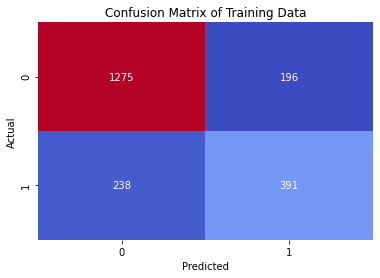

In [94]:
sns.heatmap(cm_train, annot =True, cmap ='coolwarm', fmt='', cbar =False).set_title('Confusion Matrix of Training Data');
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [95]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels)

0.7933333333333333

In [96]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1471
           1       0.67      0.62      0.64       629

    accuracy                           0.79      2100
   macro avg       0.75      0.74      0.75      2100
weighted avg       0.79      0.79      0.79      2100



## Confusion Matrix for test data

In [97]:
cm_test =confusion_matrix(test_labels, ytest_predict)

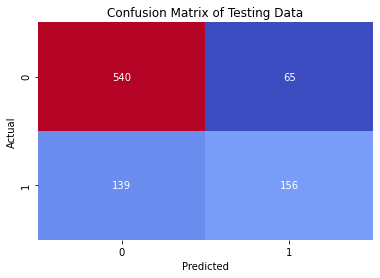

In [98]:
sns.heatmap(cm_test, annot =True, cmap ='coolwarm', fmt='', cbar =False).set_title('Confusion Matrix of Testing Data');
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [99]:
#Test Data Accuracy
reg_dt_model.score(X_test,test_labels)

0.7733333333333333

In [100]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       605
           1       0.71      0.53      0.60       295

    accuracy                           0.77       900
   macro avg       0.75      0.71      0.72       900
weighted avg       0.77      0.77      0.76       900



### AUC and ROC for the training data


AUC: 0.827


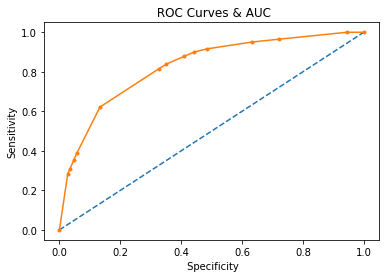

In [101]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
## Labelling 
plt.title(" ROC Curves & AUC")
plt.xlabel(" Specificity")
plt.ylabel("Sensitivity")
# show the plot
plt.show()

### AUC and ROC for the test data

AUC: 0.790


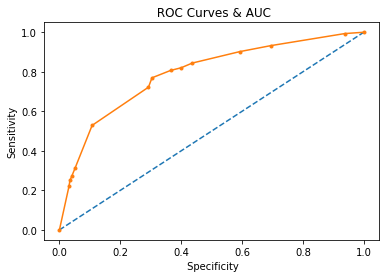

In [102]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
## Labelling 
plt.title(" ROC Curves & AUC")
plt.xlabel(" Specificity")
plt.ylabel("Sensitivity")
# show the plot
plt.show()

In [103]:
thresholds

array([1.8156682 , 0.8156682 , 0.60714286, 0.60416667, 0.6       ,
       0.56756757, 0.2997543 , 0.29166667, 0.22522523, 0.21538462,
       0.14285714, 0.09090909, 0.06428571, 0.06285714, 0.        ])

# Random Forest Model

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10,11,12],
    'max_features': [3],
    'min_samples_leaf': [50,60,70],
    'min_samples_split': [170],
    'n_estimators': [80]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [105]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 11, 12], 'max_features': [3],
                         'min_samples_leaf': [50, 60, 70],
                         'min_samples_split': [170], 'n_estimators': [80]})

In [106]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 70,
 'min_samples_split': 170,
 'n_estimators': 80}

In [107]:
best_grid = grid_search.best_estimator_

In [108]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [109]:
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob

array([[0.74102249, 0.25897751],
       [0.56732829, 0.43267171],
       [0.55724172, 0.44275828],
       ...,
       [0.52328421, 0.47671579],
       [0.83780879, 0.16219121],
       [0.84363001, 0.15636999]])

In [110]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.741022,0.258978
1,0.567328,0.432672
2,0.557242,0.442758
3,0.328485,0.671515
4,0.905396,0.094604


In [111]:
cm_train = confusion_matrix(train_labels, ytrain_predict)

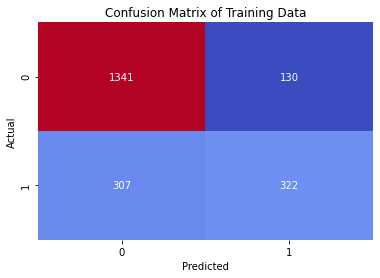

In [112]:
sns.heatmap(cm_train, annot =True, cmap ='coolwarm', fmt='', cbar =False).set_title('Confusion Matrix of Training Data');
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [113]:
cm_test =confusion_matrix(test_labels, ytest_predict)

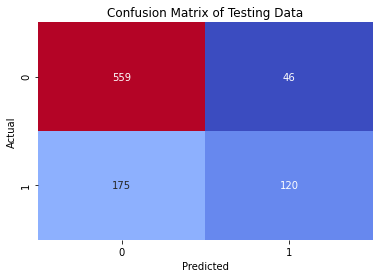

In [114]:
sns.heatmap(cm_test, annot =True, cmap ='coolwarm', fmt='', cbar =False).set_title('Confusion Matrix of Testing Data');
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [115]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1471
           1       0.71      0.51      0.60       629

    accuracy                           0.79      2100
   macro avg       0.76      0.71      0.73      2100
weighted avg       0.78      0.79      0.78      2100



In [116]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       605
           1       0.72      0.41      0.52       295

    accuracy                           0.75       900
   macro avg       0.74      0.67      0.68       900
weighted avg       0.75      0.75      0.73       900



### AUC and ROC for the training data



AUC: 0.826


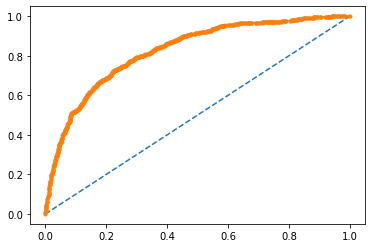

In [117]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


### AUC and ROC for the test data



AUC: 0.810


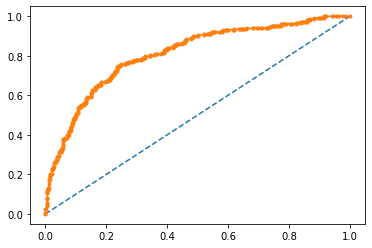

In [118]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [119]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Important Feature"], index = X_train.columns).sort_values('Important Feature',ascending=False))

              Important Feature
Agency_Code            0.291912
Product Name           0.255937
Sales                  0.142252
Commision              0.131622
Type                   0.102079
Duration               0.050090
Age                    0.022555
Destination            0.003554
Channel                0.000000


# MLP Classifier (Artificial Neural Network)


In [120]:
from sklearn.neural_network import MLPClassifier

In [121]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [141]:
param_grid = {
    'hidden_layer_sizes': [(500,500,500)],
    'activation': ['relu'],
    'solver': ['adam'],
    'tol': [0.1],
    'max_iter' : [1000]
}

clf = MLPClassifier()

grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 3)

In [142]:
grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(500, 500, 500)],
                         'max_iter': [1000], 'solver': ['adam'], 'tol': [0.1]})

In [143]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (500, 500, 500),
 'max_iter': 1000,
 'solver': 'adam',
 'tol': 0.1}

In [144]:
best_grid = grid_search.best_estimator_

In [145]:
ytrain_predict = best_grid.predict(X_trains)
ytest_predict = best_grid.predict(X_tests)

In [146]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1471
           1       0.66      0.66      0.66       629

    accuracy                           0.79      2100
   macro avg       0.76      0.76      0.76      2100
weighted avg       0.79      0.79      0.79      2100



In [147]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       605
           1       0.69      0.55      0.61       295

    accuracy                           0.77       900
   macro avg       0.75      0.72      0.73       900
weighted avg       0.76      0.77      0.76       900



AUC: 0.852


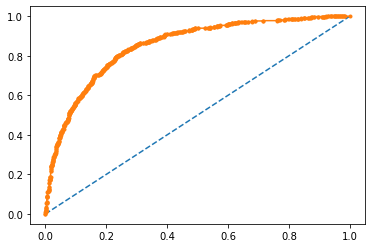

In [148]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_trains)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


AUC: 0.815


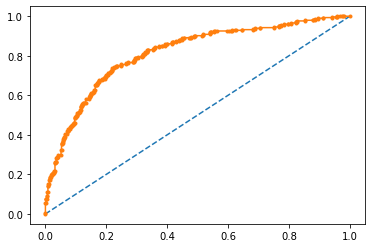

In [149]:
# AUC and ROC for the test data

# predict probabilities
probs = best_grid.predict_proba(X_tests)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [150]:
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob

array([[9.99991808e-01, 8.19178697e-06],
       [3.70071125e-01, 6.29928875e-01],
       [9.99414655e-01, 5.85345314e-04],
       ...,
       [8.29076500e-01, 1.70923500e-01],
       [9.99994915e-01, 5.08471765e-06],
       [7.03457004e-01, 2.96542996e-01]])

In [151]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.999992,0.000008
1,0.370071,0.629929
2,0.999415,0.000585
3,0.999657,0.000343
4,0.999536,0.000464


In [152]:
cm_train = confusion_matrix(train_labels, ytrain_predict)

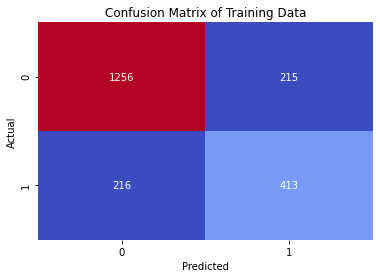

In [153]:
sns.heatmap(cm_train, annot =True, cmap ='coolwarm', fmt='', cbar =False).set_title('Confusion Matrix of Training Data');
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [154]:
cm_test =confusion_matrix(test_labels, ytest_predict)

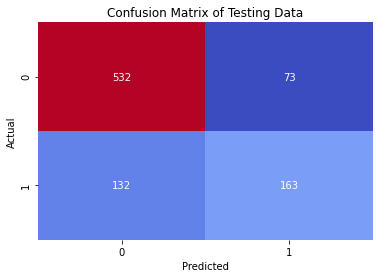

In [155]:
sns.heatmap(cm_test, annot =True, cmap ='coolwarm', fmt='', cbar =False).set_title('Confusion Matrix of Testing Data');
plt.xlabel("Predicted")
plt.ylabel("Actual");